# Importing the corresponding libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

# Importing the diamonds_train csv to Jupyter Notebook

In [2]:
training_df = pd.read_csv("../input/diamonds-datamad0120/diamonds_train.csv")
training_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


# Cleaning Data

### Column 'cut'

In [3]:
# List of values from 'cut' column
cuts_column=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
# Replacing all the values in order to get the importance for each value 
for x,y in enumerate(cuts_column):
    print(f"The value '{y}' now is {x}")
    training_df['cut'] = training_df['cut'].replace(y, x)

The value 'Fair' now is 0
The value 'Good' now is 1
The value 'Very Good' now is 2
The value 'Premium' now is 3
The value 'Ideal' now is 4


### Column 'color'

In [4]:
# Replacing all the values in order to get the importance for each value 
color_column = ['J','I','H','G','F','E','D']
for x,y in enumerate(color_column):
    print(f"The value '{y}' now is {x}")
    training_df['color'] = training_df['color'].replace(y, x)

The value 'J' now is 0
The value 'I' now is 1
The value 'H' now is 2
The value 'G' now is 3
The value 'F' now is 4
The value 'E' now is 5
The value 'D' now is 6


### Column 'carat'

In [5]:
# clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
clarity_column = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
# Replacing all the values in order to get the importance for each value 
for x,y in enumerate(clarity_column):
    print(f"The value '{y}' now is {x}")
    training_df['clarity'] = training_df['clarity'].replace(y, x)

The value 'I1' now is 0
The value 'SI2' now is 1
The value 'SI1' now is 2
The value 'VS2' now is 3
The value 'VS1' now is 4
The value 'VVS2' now is 5
The value 'VVS1' now is 6
The value 'IF' now is 7


### Final DataFrame

In [6]:
training_df.head(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,3,4,4,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,4,6,2,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,4,4,2,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,4,5,5,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,4,0,2,61.4,55.0,5.58,5.62,3.44,1276


# Correlation table (Raw Data)

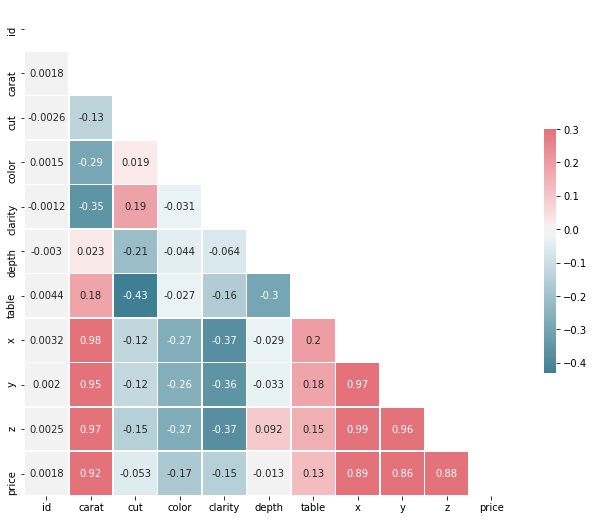

In [7]:
corr = training_df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .5}, annot=True);

In [8]:
training_df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [9]:
X = training_df.drop(columns=['id','x', 'y','z', 'price'])
y = training_df['price']

In [10]:
'''pipeline = [MinMaxScaler(feature_range=(0, 1))]
tr = make_pipeline(*pipeline)
Xpr = tr.fit_transform(X)
Xpr = pd.DataFrame(Xpr)'''

'pipeline = [MinMaxScaler(feature_range=(0, 1))]\ntr = make_pipeline(*pipeline)\nXpr = tr.fit_transform(X)\nXpr = pd.DataFrame(Xpr)'

In [11]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
rf_reg = RandomForestRegressor(n_estimators=300, max_depth=30)

In [13]:
rf_reg.fit(X_train1, y_train1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [14]:
#variables más importantes
#rf_reg.feature_importances_

In [15]:
print(rf_reg.score(X_train1, y_train1))
print(rf_reg.score(X_test1, y_test1))

0.9972333430634184
0.9801475341956584


In [16]:
print('*** METRIC SUMMARY ***')
print('MSE', mean_squared_error(y_test1, rf_reg.predict(X_test1)))
print('RMSE', np.sqrt(mean_squared_error(y_test1, rf_reg.predict(X_test1))))
print('MSLE', mean_squared_log_error(y_test1, rf_reg.predict(X_test1)))
print('MAE', mean_absolute_error(y_test1, rf_reg.predict(X_test1)))
print('R2', r2_score(y_test1, rf_reg.predict(X_test1)))

*** METRIC SUMMARY ***
MSE 311060.93811480433
RMSE 557.7283730587895
MSLE 0.012063393505825835
MAE 284.76568438816935
R2 0.9801475341956584


### Repetir los pasos con el 100% de los datos

In [17]:
rf_reg.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Importamos el test

In [18]:
#Importing the csv to Jupyter Notebook
test_df = pd.read_csv("../input/diamonds-datamad0120/diamonds_test.csv")
test_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.10,Premium,H,SI2,62.2,58.0,6.69,6.60,4.13
1,1,0.51,Ideal,I,SI1,62.5,57.0,5.07,5.10,3.18
2,2,2.03,Premium,G,SI1,61.9,59.0,8.14,8.09,5.02
3,3,1.21,Premium,F,SI1,60.0,60.0,6.96,6.91,4.16
4,4,0.55,Ideal,F,SI1,61.8,55.0,5.27,5.22,3.24


### Repetir la limpieza que hemos hecho antes de entrenar el modelo

In [19]:
#X_test = pd.get_dummies(test_df)
#X_test.head()

In [20]:
X_test = training_df.drop(columns=['id','x', 'y','z', 'price']])

SyntaxError: invalid syntax (<ipython-input-20-9658f63f4aa0>, line 1)

In [ ]:
X_test.head()

In [ ]:
'''pipeline = [MinMaxScaler(feature_range=(0, 1))]
tr = make_pipeline(*pipeline)
Xpr_test = tr.fit_transform(X_test)
Xpr = pd.DataFrame(Xpr_test)'''

In [ ]:
Y_pred = rf_reg.predict(X_test)

# Crear nuevo DataFrame

In [ ]:
last_file = pd.DataFrame()
last_file['id'] = test_df['id']

In [ ]:
last_file['price'] = pd.Series(Y_pred)

In [ ]:
last_file.to_csv('predictions_random_forest_v2.csv',index = False)